In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [ ]:
data = yf.Ticker('BTC-USD').history('4y','1d')
data.shape


(1462, 7)

In [ ]:
useful_data = data[data.columns[:-2]]
useful_data.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2022-04-05,46624.507812,47106.140625,45544.808594,45555.992188,29640604055
2022-04-06,45544.355469,45544.355469,43193.953125,43206.738281,39393395788
2022-04-07,43207.500000,43860.699219,42899.906250,43503.847656,26101973106
2022-04-08,43505.136719,43903.019531,42183.289062,42287.664062,27215995394
2022-04-09,42366.214844,42602.468750,42189.343750,42321.464844,20720640000


In [ ]:
n=60

In [ ]:
train=useful_data.iloc[:data.shape[0]-n]
test=useful_data.iloc[data.shape[0]-n:]
train.shape,test.shape

((1402, 5), (60, 5))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [ ]:
train_scaled[:10]

array([[0.0592107 , 0.05957074, 0.05492396, 0.05493494, 0.00566132],
       [0.05534091, 0.05490458, 0.05559114, 0.05593027, 0.00387617],
       [0.05608772, 0.05636853, 0.05738634, 0.05800644, 0.00493679],
       [0.05782779, 0.07057781, 0.057211  , 0.07232214, 0.01718914],
       [0.07253249, 0.07492389, 0.07228314, 0.07242645, 0.01390855],
       [0.07212169, 0.07426373, 0.07366103, 0.07382984, 0.00651572],
       [0.07406001, 0.07728154, 0.0760875 , 0.0791597 , 0.00666815],
       [0.07931925, 0.07778113, 0.07492277, 0.07495575, 0.00777958],
       [0.07518466, 0.0764808 , 0.07422631, 0.07252174, 0.01142731],
       [0.07320638, 0.07513514, 0.07429419, 0.07658407, 0.01036144]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=n
n_features=1
generator=TimeseriesGenerator(train_scaled,train_scaled,length=n_input,batch_size=n_features)

In [ ]:
X,y=generator[0]
print(f'given array : {X.flatten()}')
print(f'predict this : {y}')


given array : [0.0592107  0.05957074 0.05492396 0.05493494 0.00566132 0.05534091
 0.05490458 0.05559114 0.05593027 0.00387617 0.05608772 0.05636853
 0.05738634 0.05800644 0.00493679 0.05782779 0.07057781 0.057211
 0.07232214 0.01718914 0.07253249 0.07492389 0.07228314 0.07242645
 0.01390855 0.07212169 0.07426373 0.07366103 0.07382984 0.00651572
 0.07406001 0.07728154 0.0760875  0.0791597  0.00666815 0.07931925
 0.07778113 0.07492277 0.07495575 0.00777958 0.07518466 0.0764808
 0.07422631 0.07252174 0.01142731 0.07320638 0.07513514 0.07429419
 0.07658407 0.01036144 0.07654689 0.07667512 0.0782943  0.07861873
 0.01189372 0.07853108 0.08555166 0.07996797 0.08719202 0.01584408
 0.08726813 0.08734272 0.08641844 0.08796537 0.01328819 0.08845403
 0.08740483 0.08843551 0.08651784 0.01064873 0.08642227 0.08674711
 0.08858109 0.0885141  0.01149716 0.08859833 0.09856226 0.0907811
 0.10043108 0.02228202 0.10051948 0.09875627 0.08875564 0.08719062
 0.02344366 0.08755625 0.09167673 0.08760437 0.09396

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(120,activation='tanh',input_shape=(n_input,5), return_sequences = True,))
model.add(tf.keras.layers.LSTM(100,activation='tanh', return_sequences = True,))
model.add(tf.keras.layers.LSTM(80,activation='tanh', return_sequences = True,))
model.add(tf.keras.layers.LSTM(50,activation='tanh'))
model.add(tf.keras.layers.Dense(5))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 60, 120)           60480     
                                                                 
 lstm_24 (LSTM)              (None, 60, 100)           88400     
                                                                 
 lstm_25 (LSTM)              (None, 60, 80)            57920     
                                                                 
 lstm_26 (LSTM)              (None, 50)                26200     
                                                                 
 dense_9 (Dense)             (None, 5)                 255       
                                                                 
Total params: 233,255
Trainable params: 233,255
Non-trainable params: 0
_________________________________________________________________


In [ ]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5, restore_best_weights=True)

In [ ]:
model.fit(generator,epochs=100,verbose=2,callbacks=[earlystopper])


Epoch 1/100
1342/1342 - 61s - loss: 0.0048 - 61s/epoch - 46ms/step
Epoch 2/100
1342/1342 - 54s - loss: 0.0023 - 54s/epoch - 40ms/step
Epoch 3/100
1342/1342 - 54s - loss: 0.0016 - 54s/epoch - 40ms/step
Epoch 4/100
1342/1342 - 54s - loss: 0.0013 - 54s/epoch - 40ms/step
Epoch 5/100
1342/1342 - 54s - loss: 9.2272e-04 - 54s/epoch - 40ms/step
Epoch 6/100
1342/1342 - 54s - loss: 8.9729e-04 - 54s/epoch - 40ms/step
Epoch 7/100
1342/1342 - 54s - loss: 8.5570e-04 - 54s/epoch - 40ms/step
Epoch 8/100
1342/1342 - 54s - loss: 6.9854e-04 - 54s/epoch - 40ms/step
Epoch 9/100
1342/1342 - 54s - loss: 6.7442e-04 - 54s/epoch - 40ms/step
Epoch 10/100
1342/1342 - 54s - loss: 6.5876e-04 - 54s/epoch - 40ms/step
Epoch 11/100
1342/1342 - 53s - loss: 7.3256e-04 - 53s/epoch - 40ms/step
Epoch 12/100
1342/1342 - 53s - loss: 5.2803e-04 - 53s/epoch - 40ms/step
Epoch 13/100
1342/1342 - 53s - loss: 5.8687e-04 - 53s/epoch - 40ms/step
Epoch 14/100
1342/1342 - 53s - loss: 5.8671e-04 - 53s/epoch - 40ms/step
Epoch 15/100
1342

In [ ]:
last_train_batch=train_scaled[-n_input:].reshape(-1,n_input,5)
last_train_batch.shape

(1, 60, 5)

In [ ]:
model.predict(last_train_batch)

array([[0.64964616, 0.6632784 , 0.6584099 , 0.6616968 , 0.06518698]],
      dtype=float32)

In [ ]:
test_scaled[0]

array([0.63533246, 0.63272379, 0.63366331, 0.63892418, 0.05838975])

In [ ]:
import numpy as np

In [ ]:
test_pred=[]
curr_batch=last_train_batch.reshape(-1,n_input,5)
for i in range(len(test_scaled)-1):
  curr_pred=model.predict(curr_batch)[0]

  test_pred.append(curr_pred)

  curr_batch=np.append(curr_batch[:,1:,:],[[test_scaled[i+1]]],axis=1)


In [ ]:
true_pred=scaler.inverse_transform(test_pred)
true_pred

array([[4.50172670e+04, 4.67295630e+04, 4.47967244e+04, 4.58037603e+04,
        2.56116241e+10],
       [4.50011208e+04, 4.67418401e+04, 4.46906005e+04, 4.58105356e+04,
        2.76639635e+10],
       [4.30835717e+04, 4.48873192e+04, 4.26798179e+04, 4.39742324e+04,
        2.82406190e+10],
       [4.35270632e+04, 4.51188946e+04, 4.30180011e+04, 4.42886508e+04,
        2.55021939e+10],
       [4.30164070e+04, 4.45493142e+04, 4.25383420e+04, 4.37384416e+04,
        2.25824570e+10],
       [4.32511287e+04, 4.47577372e+04, 4.28232975e+04, 4.39474455e+04,
        2.09791806e+10],
       [4.57235214e+04, 4.71381226e+04, 4.53707936e+04, 4.63120828e+04,
        2.04177455e+10],
       [4.42893540e+04, 4.58910250e+04, 4.40114094e+04, 4.50072503e+04,
        2.10687046e+10],
       [4.09114707e+04, 4.27027242e+04, 4.05639321e+04, 4.18356352e+04,
        2.19713803e+10],
       [4.12480415e+04, 4.29005414e+04, 4.08035809e+04, 4.20991600e+04,
        2.11064321e+10],
       [4.07957333e+04, 4.2375

In [ ]:
true_pred.shape,test.shape

((59, 5), (60, 5))

In [ ]:
new_test = np.array(test)
new_test.shape

(60, 5)

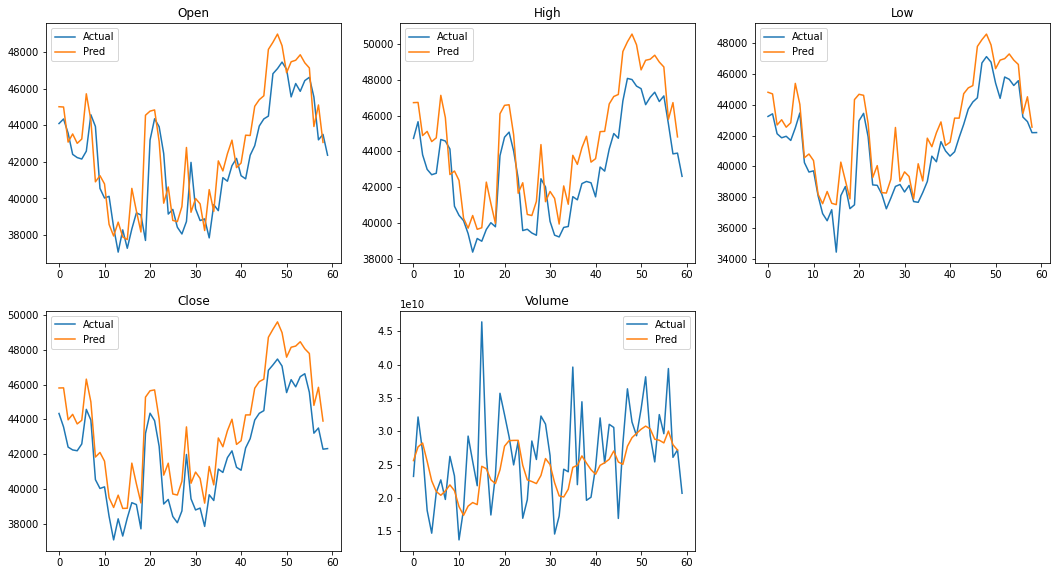

In [ ]:
plt.figure(figsize=(18,15))
for i in range(5):
  plt.subplot(3,3,i+1)
  plt.plot(new_test[:,i:i+1],label='Actual')
  plt.plot(true_pred[:,i:i+1],label='Pred')
  plt.title(test.columns[i])
  plt.legend()

In [ ]:
model.save('model')

INFO:tensorflow:Assets written to: model/assets


INFO:tensorflow:Assets written to: model/assets


In [ ]:
!zip 'model' 'model'

  adding: model/ (stored 0%)
